# Titanic Survival

# Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant
from imblearn.over_sampling import SMOTE

# Load Dataset

In [ ]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic_data/train.csv')

df.shape

(891, 12)

In [ ]:
# Showing top 5 rows of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# sample 10 rows of the data
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C


# Data Dictionary

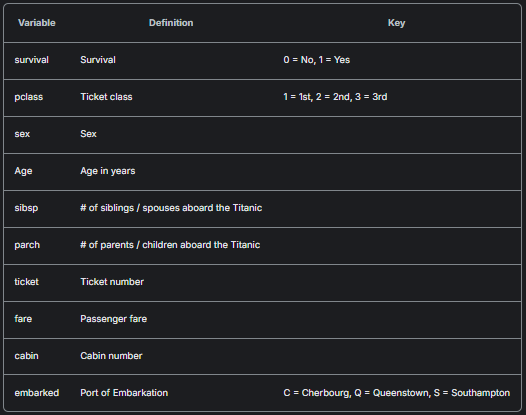


# Data Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Duplicated Data Check

In [ ]:
df.duplicated().sum()

0

## Missing Value

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Fill data in the Age Column with Median

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

### Fill data in the Embarked Column with Mode

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### Drop column Cabin

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Exploratory Data Analysis

## Univariate Analysis

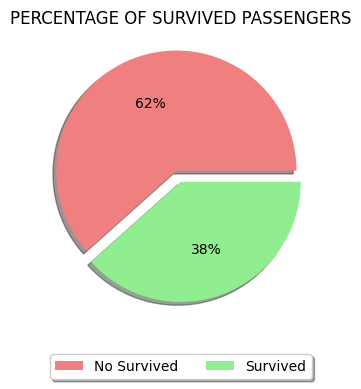

In [ ]:
# Percentage of Survived Passengers
per_survive = df.groupby('Survived')['PassengerId'].count().reset_index()
labels = ['No Survived', 'Survived']
color=['lightcoral','lightgreen']

plt.figure(figsize=(5, 4))
plt.pie(per_survive['PassengerId'],
        shadow=True,
        colors=color,
        explode=[0.1, 0],
        autopct='%0.f%%')
plt.title('PERCENTAGE OF SURVIVED PASSENGERS', loc='center')
plt.legend(labels, loc="upper center", bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=2, fontsize='medium')
plt.tight_layout()
plt.show()

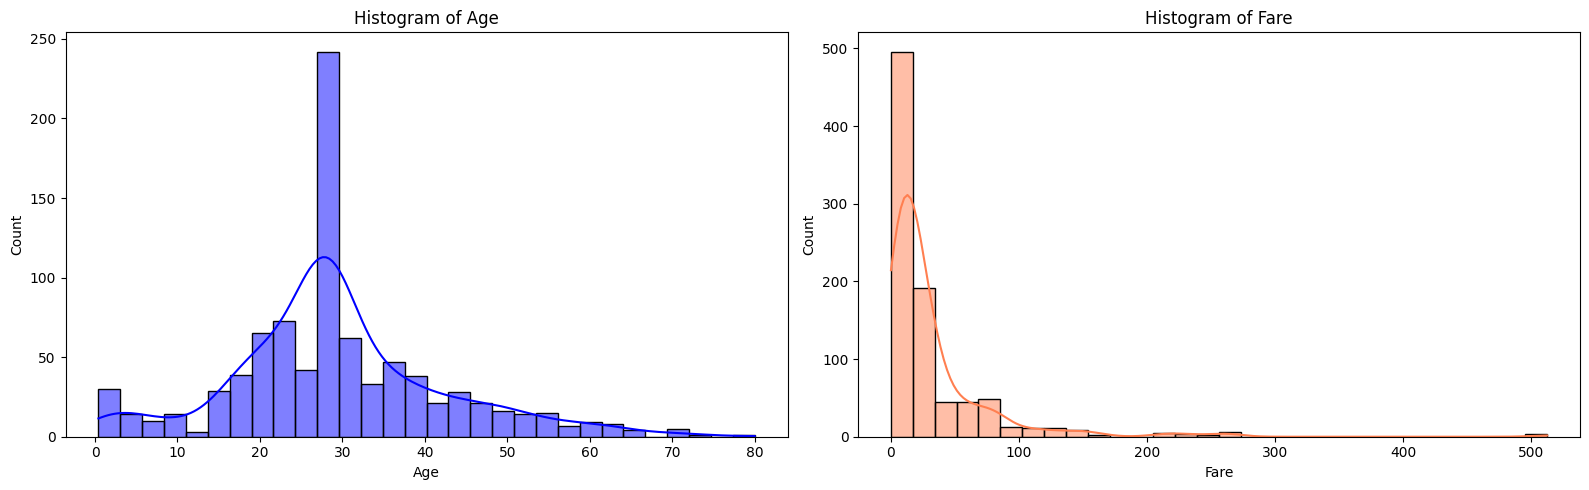

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the histogram with distribution line for age
sns.histplot(df['Age'], bins=30, color='blue', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

# Plot the histogram with distribution line for fare
sns.histplot(df['Fare'], bins=30, color='coral', kde=True, ax=axes[1])
axes[1].set_title('Histogram of Fare')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

*   `Age` was normally distributed with a peak around the 30-years.
*   `Fare` distribution is heavily right-skewed, indicating that most passengers paid lower fares, with a few paying substantially higher amounts.






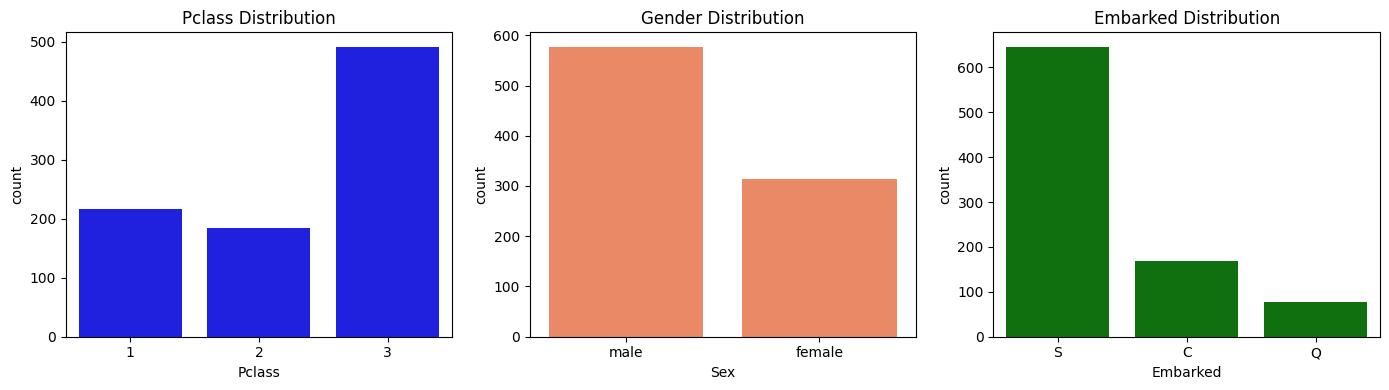

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot the countplot for Pclass
sns.countplot(data=df, x='Pclass', color='blue', ax=axes[0])
axes[0].set_title('Pclass Distribution')

# Plot the countplot for Sex
sns.countplot(data=df, x='Sex', color='coral', ax=axes[1])
axes[1].set_title('Gender Distribution')

# Plot the countplot for Embarked
sns.countplot(data=df, x='Embarked', color='green', ax=axes[2])
axes[2].set_title('Embarked Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

## Bivariate Analysis

In [ ]:
# Remember the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Does the age of passengers affect their chances of survival?**

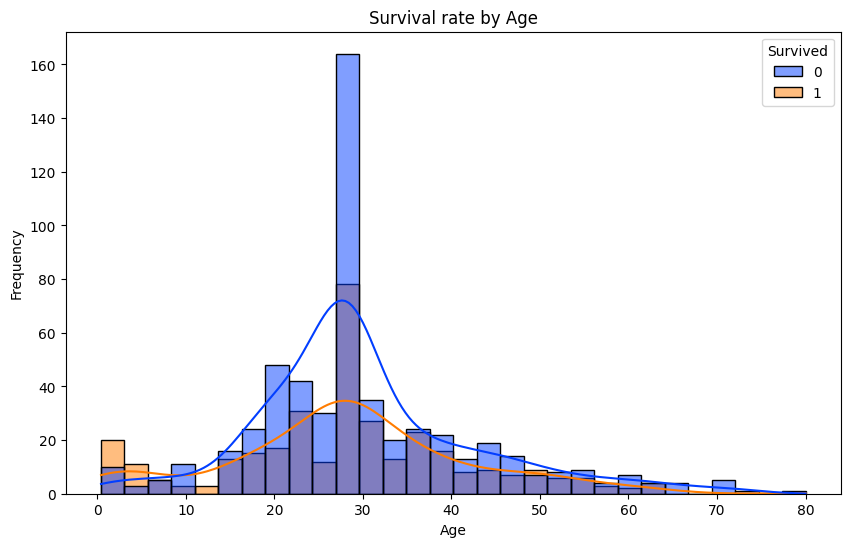

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette="bright")

# Set plot
plt.title("Survival rate by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show the plot
plt.show()

Children under 10 years have a better chance of surviving, perhaps because they are prioritized for rescue using lifeboats.

**Does gender have a significant impact on survival rates?**

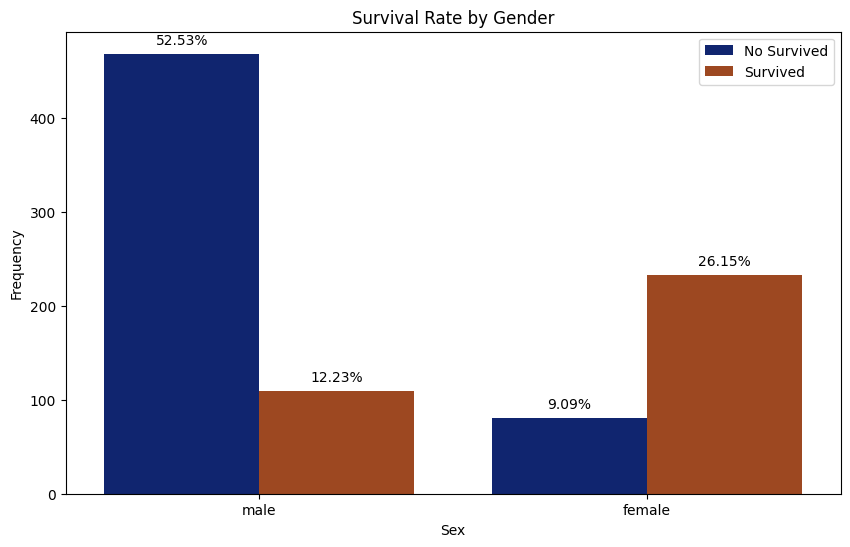

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette="dark")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Frequency")
legend_labels = ['No Survived', 'Survived']
ax.legend(labels=legend_labels)

# Show the plot
plt.show()

The survival rate for female passengers has a significant impact on the overall survival rate. This indicates that female passengers were given priority for survival.

**Does the fare paid affect survival rate?**

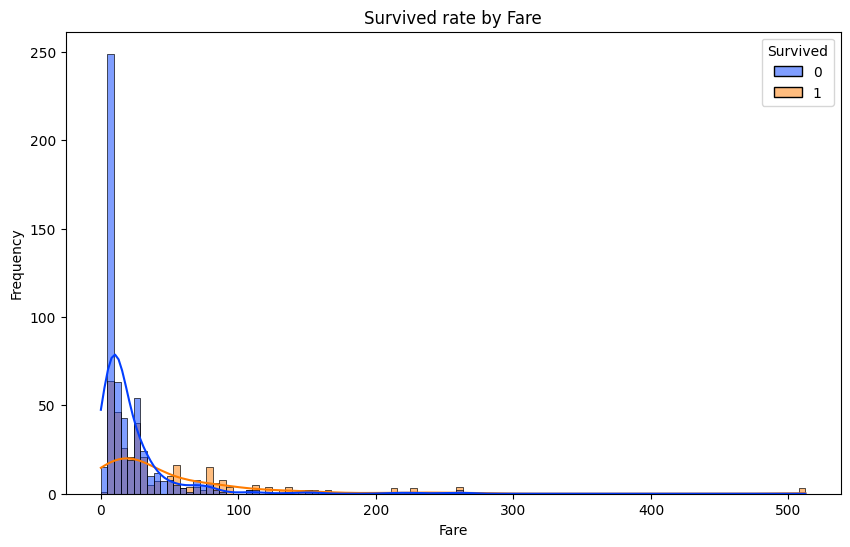

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Fare', hue='Survived', kde=True, palette="bright")

# Set plot
plt.title("Survived rate by Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Show the plot
plt.show()

Passengers with high fares have a better chance of surviving than those with low fares.

**Which passenger classes had the highest survival rates?**

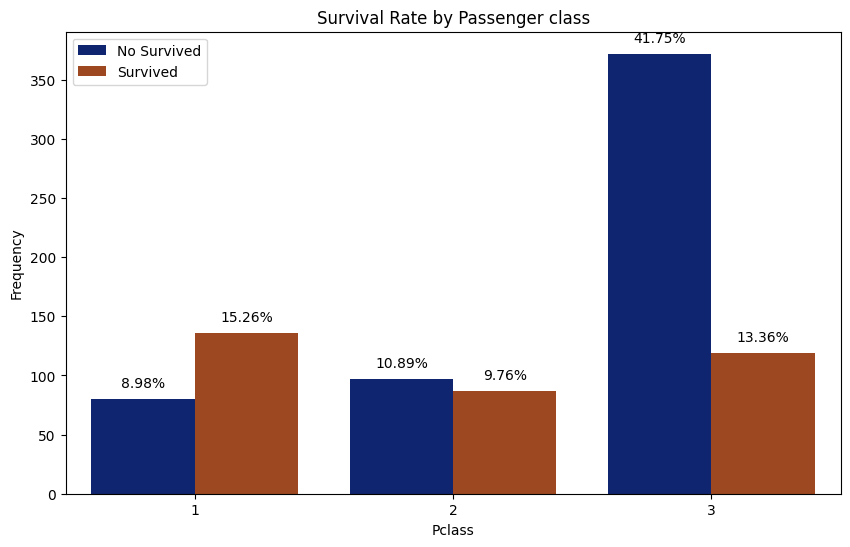

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette="dark")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Survival Rate by Passenger class")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
legend_labels = ['No Survived', 'Survived']
ax.legend(labels=legend_labels)

# Show the plot
plt.show()

Passengers in First Class had the highest survival rate. This suggests that First Class passengers had priority access to lifeboats or other rescue measures.

**Does Port of Embarkation affect Survival rate?**

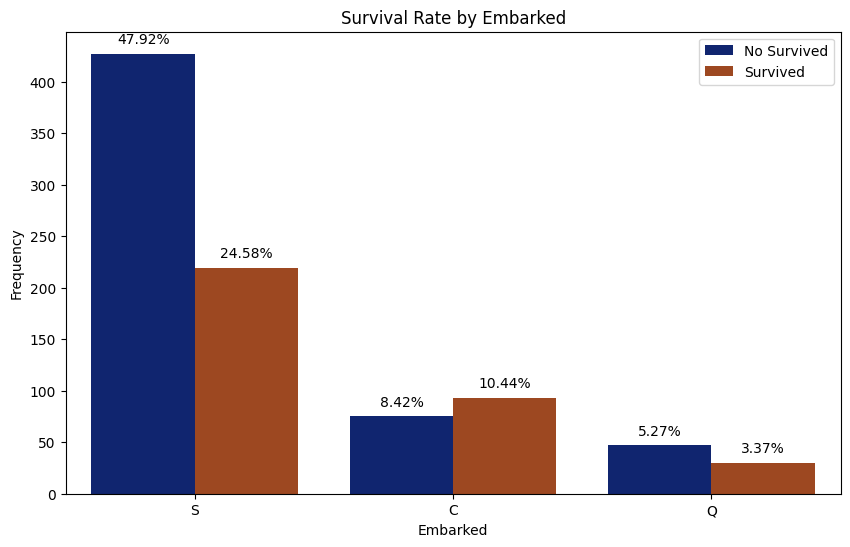

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Embarked', hue='Survived', data=df, palette="dark")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Survival Rate by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Frequency")
legend_labels = ['No Survived', 'Survived']
ax.legend(labels=legend_labels)

# Show the plot
plt.show()

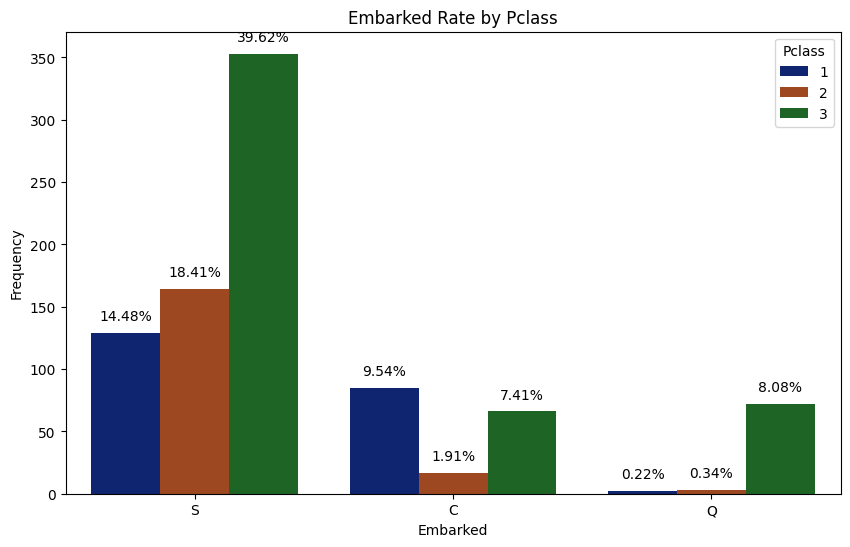

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Embarked', hue='Pclass', data=df, palette="dark")

# Add percentage labels on top of the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Add this condition to check if the height is not zero
        ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{(height/total) * 100:.2f}%', ha="center")

# Set plot title and labels
plt.title("Embarked Rate by Pclass")
plt.xlabel("Embarked")
plt.ylabel("Frequency")

# Show the plot
plt.show()

The highest survival rate was observed among passengers who embarked from Cherbourg (C). This suggests that passengers who embarked from Cherbourg were predominantly first class passengers (Pclass = 1).

**How does the number of family members aboard the Titanic (SibSp and Parch) influence a passenger's likelihood of survival?**

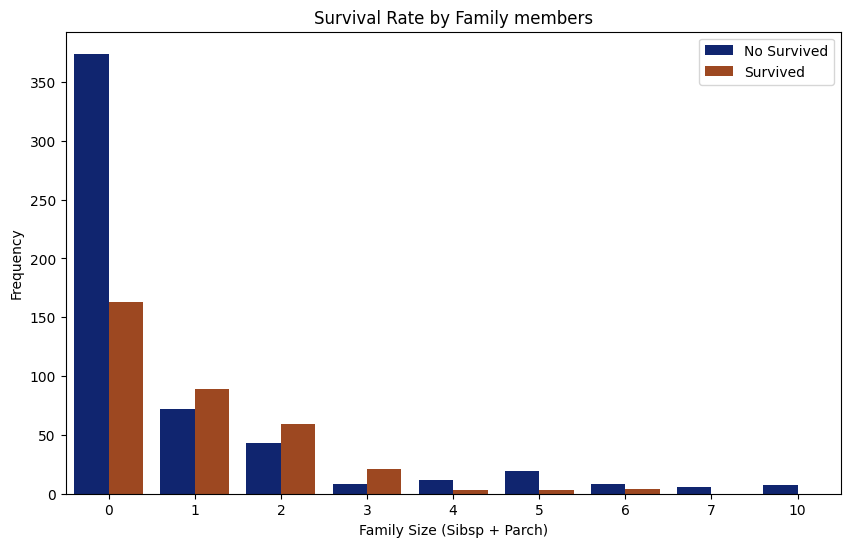

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
df['Family_Size'] = df['SibSp'] + df['Parch']
ax = sns.countplot(x='Family_Size', hue='Survived', data=df, palette="dark")

# Set plot title and labels
plt.title("Survival Rate by Family members")
plt.xlabel("Family Size (Sibsp + Parch)")
plt.ylabel("Frequency")
legend_labels = ['No Survived', 'Survived']
ax.legend(labels=legend_labels)

# Show the plot
plt.show()

Overall, the graph shows that the number of family members had an influence on the survival rate of Titanic passengers. Having one to three family members tends to increase the chances of survival, but having too many family members can actually decrease those chances.

In [ ]:
# Drop Family Size
df = df.drop('Family_Size', axis=1)

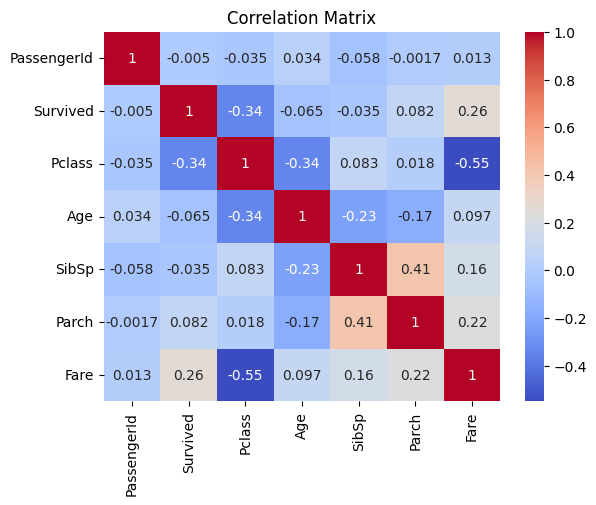

In [ ]:
# Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- `Pclass` and `Fare` have a negative correlation; the lower the Pclass, the higher the Fare.
- The most influential feature on `Survived` is `Pclass`.





# Data Preprocessing

## Drop Unnecessary Columns

In [ ]:
# Drop Unnecessary columns
df=df.drop(['Name','Ticket', 'PassengerId'],axis=1)

## Label Encoding and One Hot Encoding

In [ ]:
category_columns = ['Sex']

ordinal_columns = ['Pclass', 'Embarked']

In [ ]:
# Encode the categorical variable into numeric
def label_encoding(df, ordinal_columns):

    categoricals = df.drop(columns = ordinal_columns, axis=1).columns

    for col in categoricals:
        df[col] = df[col].replace({'male' : 1, 'female' : 0})
    return df

In [ ]:
label_encoding(df, ordinal_columns).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# Encode ordinal columns, and drop last encoding-columns to avoid multicollinearity
def onehotencoding(df, columns):

    onehot = pd.DataFrame()
    for col in columns:
        encoding = pd.get_dummies(df[col], prefix=col, dtype='float')
        encoding = encoding.drop(encoding.columns[-1], axis=1)
        onehot = pd.concat([onehot, encoding], axis=1)

    return onehot

In [ ]:
onehotencoding(df, ordinal_columns).head()

,Pclass_1,Pclass_2,Embarked_C,Embarked_Q
0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


All columns have been converted to numeric, and we also removed the last column in Pclass, and Embarked because failing to do so would result in a very high Variance Inflation Factor (VIF).

## Multicolinearity Handling

In [ ]:
# Calculate multicollinearity
def calculate_vif(feature):
    X = add_constant(feature)
    vif_df = pd.DataFrame([VIF(X.values, i) for i in range(X.shape[1])],
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

In [ ]:
def feature_cleaning(df, ordinal_columns):
    # Ensure 'Survived' is numeric
    df['Survived'] = df['Survived'].astype(int)

    # Label encode ordinal columns
    df_encode = label_encoding(df, ordinal_columns)

    # Drop ordinal columns and target column from features
    df_encode = df_encode.drop(columns=ordinal_columns)
    feature = df_encode.drop(columns='Survived')
    target = df_encode['Survived']

    # One-hot encode ordinal columns
    onehot = onehotencoding(df, ordinal_columns)
    feature = pd.concat([feature, onehot], axis=1)

    return feature, target

feature, target = feature_cleaning(df, ordinal_columns)

# Check the VIF score
calculate_vif(feature)

,feature,vif_score
1,Sex,1.131328
2,Age,1.223960
3,SibSp,1.285296
4,Parch,1.333682
5,Fare,1.765727
6,Pclass_1,2.053741
7,Pclass_2,1.189066
8,Embarked_C,1.151772
9,Embarked_Q,1.109390


<Axes: >

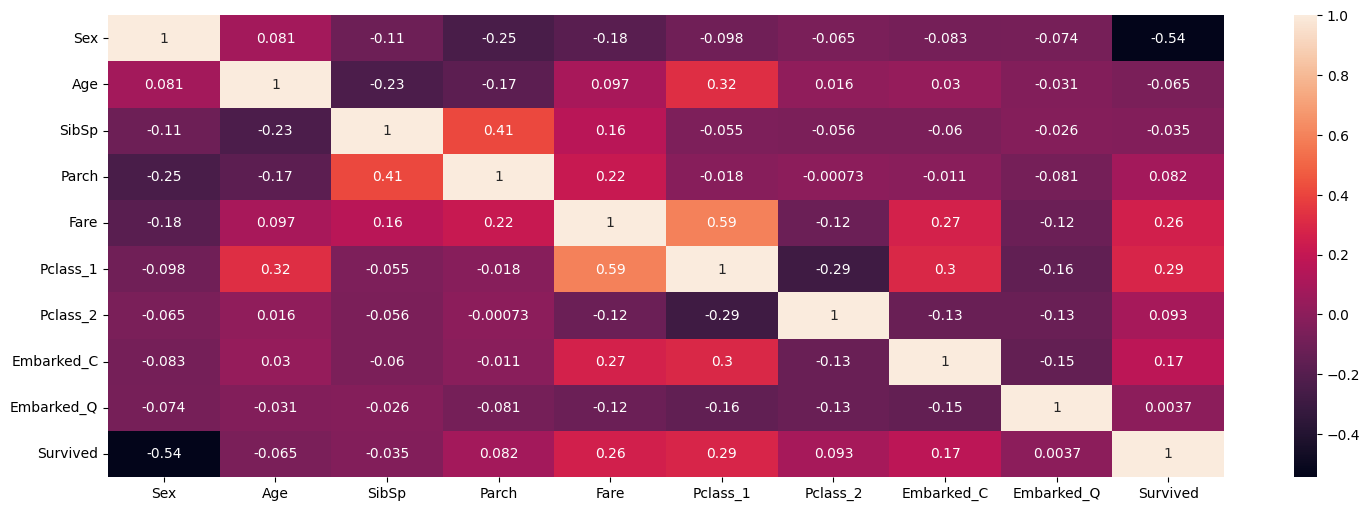

In [ ]:
# Correlation Matrix
correlation = pd.concat([feature, target], axis=1)

plt.figure(figsize=(18,6))
sns.heatmap(correlation.corr(), annot=True)

It appears that there are no variables with strong correlations, indicating good VIF values and effectively addressed multicollinearity issues. Good!

## Splitting Dataset

In [ ]:
# Splitting train and test
X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_pretrain,
                                                    y_pretrain,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Original feature and target shape of our dataset
print('Shape of original feature data : {}'.format(feature.shape))
print('Shape of original target data : {}'.format(target.shape))
print()

# Shape of X_train and y_train data
print('Shape of X_train data : {}'.format(X_train.shape))
print('Shape of y_train data : {}'.format(y_train.shape))
print()

# Shape of X_test and y_test data
print('Shape of X_test data : {}'.format(X_test.shape))
print('Shape of y_test data : {}'.format(y_test.shape))
print()

# Shape of X_val and y_val data
print('Shape of X_val data : {}'.format(X_val.shape))
print('Shape of y_val data : {}'.format(y_val.shape))
print()

Shape of original feature data : (891, 9)
Shape of original target data : (891,)

Shape of X_train data : (569, 9)
Shape of y_train data : (569,)

Shape of X_test data : (143, 9)
Shape of y_test data : (143,)

Shape of X_val data : (179, 9)
Shape of y_val data : (179,)



Now we will try the model without SMOTE and with SMOTE to compare their results.

# Model Building

## Without SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
def Models_Evaluation_Metrics (model,X_train, X_test, X_val, y_train, y_test, y_val):
    acc_train=round(model.score(X_train,y_train)*100,2)
    acc_test=round(model.score(X_test,y_test)*100,2)
    acc_val=round(model.score(X_val,y_val)*100,2)

    return acc_train, acc_test, acc_val

    print("Training Accuracy: {}%".format(acc_train))
    print("Test Accuracy: {}%".format(acc_test))
    print("Validation Accuracy: {}%".format(acc_val))

### Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],                                     # Regularization strength (the smaller C, the stronger the regulation)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],                    # Type of penalty used
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],     # Algorithm used for optimization
    'max_iter': [100, 200, 300]                                       # Maximum number of iterations
}

# Create a LogisticRegression model
lr_model = LogisticRegression(random_state=42)

# Create a GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_search_lr.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_

# Prediction on training data using the best model
y_train_pred_lr = best_model_lr.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Classification Report Training Model (Logistic Regression) :\n",
      classification_report(y_train, y_train_pred_lr, target_names=labels))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report Training Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.81      0.91      0.86       357
    Survived       0.80      0.64      0.71       212

    accuracy                           0.81       569
   macro avg       0.81      0.77      0.78       569
weighted avg       0.81      0.81      0.80       569



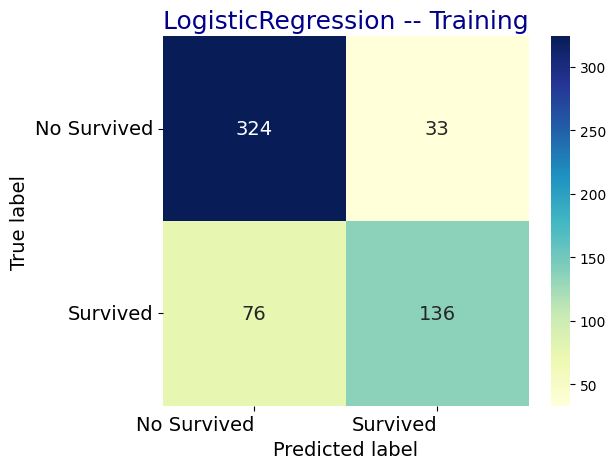

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on test data using the best model
y_test_pred_lr = best_model_lr.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Classification Report Test Model (Logistic Regression) :\n",
      classification_report(y_test, y_test_pred_lr, target_names=labels))

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report Test Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.84      0.87      0.85        87
    Survived       0.79      0.73      0.76        56

    accuracy                           0.82       143
   macro avg       0.81      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



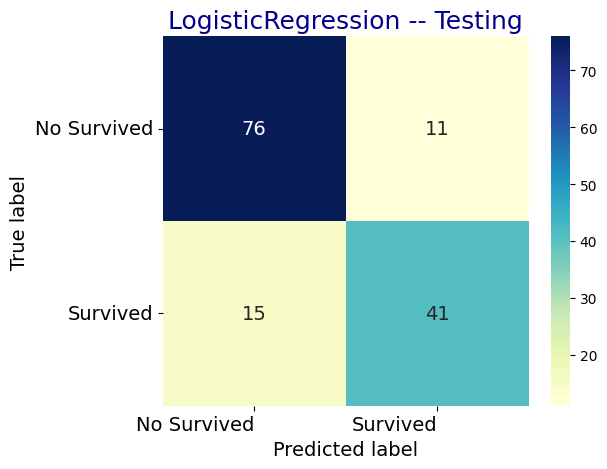

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Testing', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on validation data using the best model
y_val_pred_lr = best_model_lr.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Classification Report Validation Model (Logistic Regression) :\n",
      classification_report(y_val, y_val_pred_lr, target_names=labels))

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Classification Report Validation Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.80      0.86      0.83       105
    Survived       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



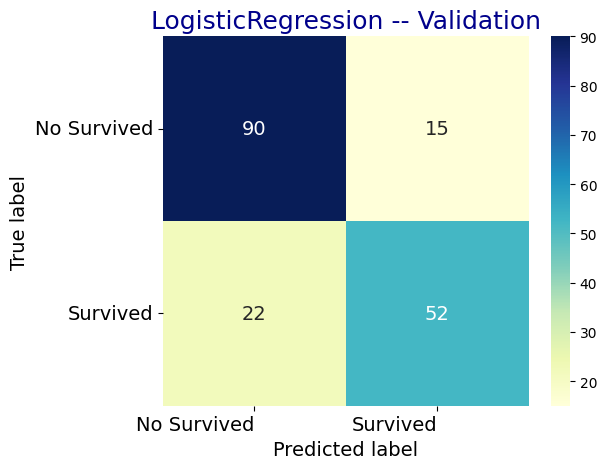

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_lr)),('No Survived','Survived'),('No Survived','Survived') )
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Validation', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_lr, X_train, X_test, X_val, y_train, y_test, y_val)]

lr_model_score = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy', 'Validation Accuracy'])
lr_model_score.insert(0, 'Model', 'Logistic Regression')

### Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 1000],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]                 # Maximum depth of the tree
}

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_search_rf.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Prediction on training data using the best model
y_train_pred_rf = best_model_rf.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf)
print("Classification Report Training Model (Random Forest Classifier) :\n",
      classification_report(y_train, y_train_pred_rf, target_names=labels))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Training Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.93      0.99      0.96       357
    Survived       0.98      0.88      0.93       212

    accuracy                           0.95       569
   macro avg       0.96      0.93      0.94       569
weighted avg       0.95      0.95      0.95       569



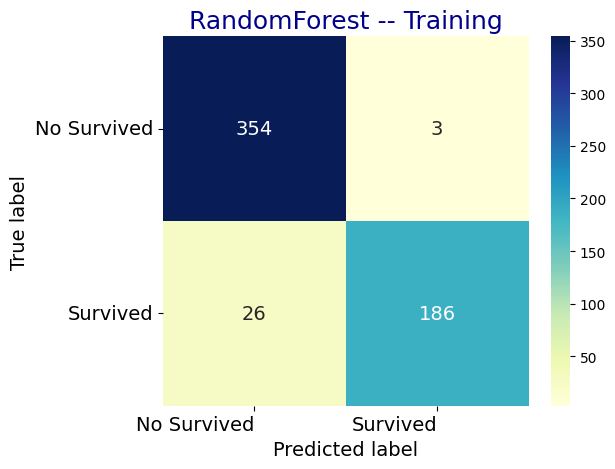

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('RandomForest -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on test data using the best model
y_test_pred_rf = best_model_rf.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf)
print("Classification Report Test Model (Random Forest Classifier) :\n",
      classification_report(y_test, y_test_pred_rf, target_names=labels))

Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Test Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.84      0.87      0.86        87
    Survived       0.79      0.75      0.77        56

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143



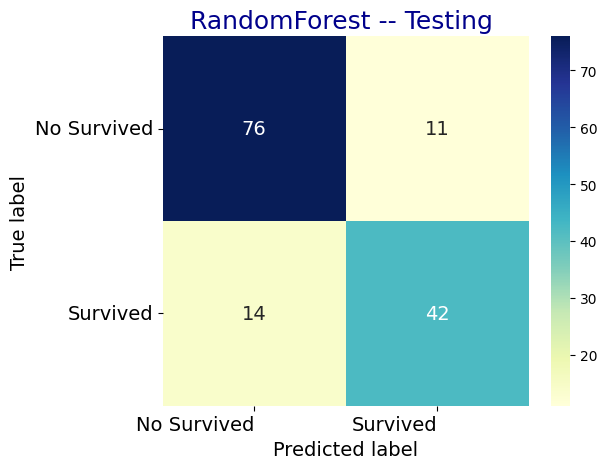

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('RandomForest -- Testing ', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on Validation data using the best model
y_val_pred_rf = best_model_rf.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf)
print("Classification Report Validation Model (Random Forest Classifier) :\n",
      classification_report(y_val, y_val_pred_rf, target_names=labels))

Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Validation Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.83      0.90      0.86       105
    Survived       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



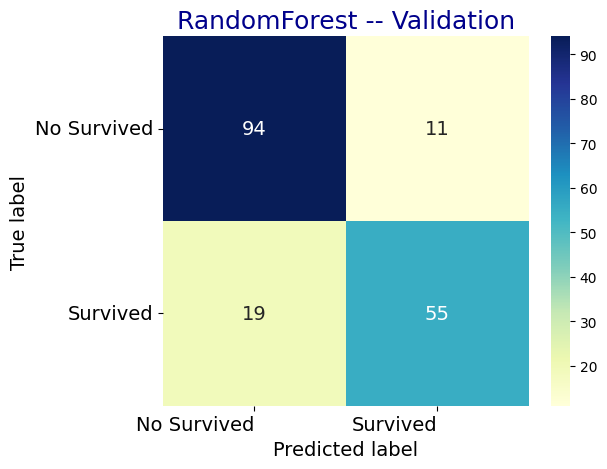

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_rf)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('RandomForest -- Validation', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_rf, X_train, X_test, X_val, y_train, y_test, y_val)]

rf_model_score = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy','Validation Accuracy'])
rf_model_score.insert(0, 'Model', 'Random Forest')

### Extreme Gradient Boosting (XGBoost)

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 150, 200],            # Number of trees in the ensemble
    'max_depth': [3, 6, 10],                    # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],          # Learning rate (learning rate)
    'gamma': [0, 0.1, 0.2],                     # Minimum loss reduction to create a new split
}

# Create an XGBClassifier model
xgb_model = XGBClassifier(random_state=42)

# Create a GridSearchCV
grid_searc_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_searc_xgb.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_xgb = grid_searc_xgb.best_params_
best_model_xgb = grid_searc_xgb.best_estimator_

# Prediction on training data using the best model
y_train_pred_xgb = best_model_xgb.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb)
print("Classification Report Training Model (XGB Classifier) :\n",
      classification_report(y_train, y_train_pred_xgb, target_names=labels))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGB Classifier: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Classification Report Training Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.84      0.91      0.87       357
    Survived       0.82      0.71      0.76       212

    accuracy                           0.83       569
   macro avg       0.83      0.81      0.82       569
weighted avg       0.83      0.83      0.83       569



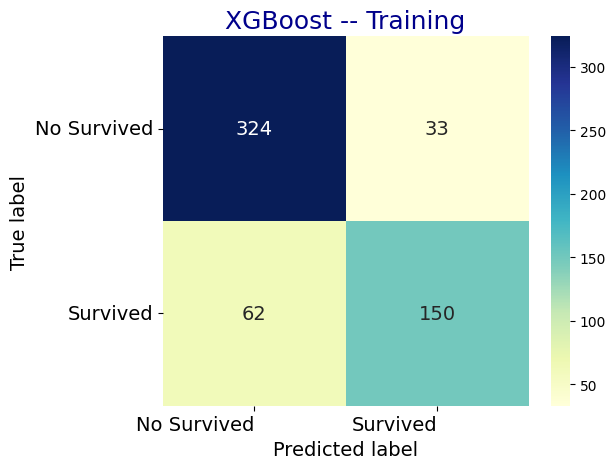

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Training', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on Test data using the best model
y_test_pred_xgb = best_model_xgb.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb)
print("Classification Report Test Model (XGB Classifier) :\n",
      classification_report(y_test, y_test_pred_xgb, target_names=labels))

Best Parameters for XGB Classifier: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Classification Report Test Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.84      0.87      0.86        87
    Survived       0.79      0.75      0.77        56

    accuracy                           0.83       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.83      0.82       143



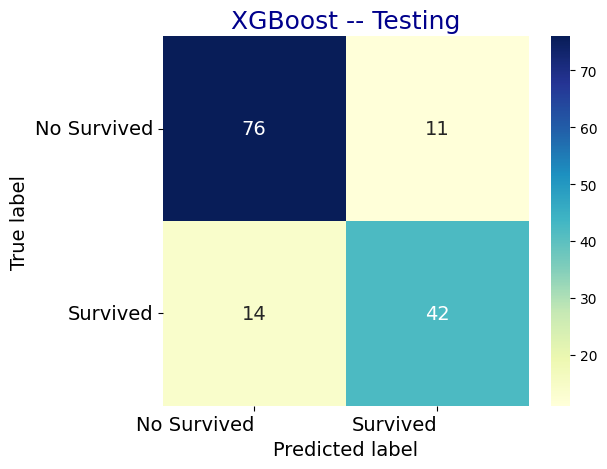

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Testing', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on validation data using the best model
y_val_pred_xgb = best_model_xgb.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb)
print("Classification Report Validation Model (XGB Classifier) :\n",
      classification_report(y_val, y_val_pred_xgb, target_names=labels))

Best Parameters for XGB Classifier: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Classification Report Validation Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.81      0.88      0.84       105
    Survived       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



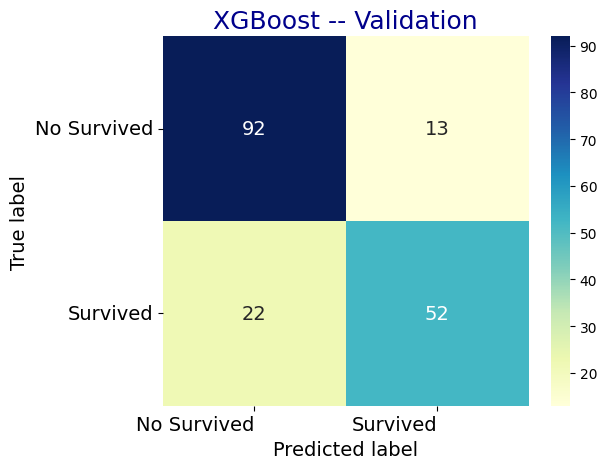

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_xgb)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Validation', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_xgb, X_train, X_test, X_val, y_train, y_test, y_val)]

xgb_model_score = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy','Validation Accuracy'])
xgb_model_score.insert(0, 'Model', 'XGBoost')

## With SMOTE (Synthetic Minority Over-sampling Technique)

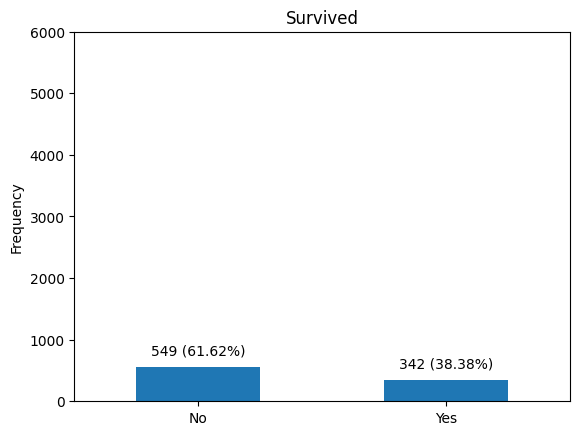

In [ ]:
def imbalanced_viz(target):
    # Mapping class labels into 'No' and 'Yes'
    target_class = target.map({0 : 'No', 1 : 'Yes'})

    # Plot the number of each class in the form of a bar chart
    target_class.value_counts().plot(kind='bar', title='Survived')
    plt.tick_params(axis='x', rotation=0)
    plt.xlabel('')
    plt.ylabel('Frequency')

    counts = target_class.value_counts()
    percentage = counts / np.sum(counts) * 100

    labels = [str(counts[0]) + " (" + f'{percentage[0]:.2f}' + '%' + ")",
              str(counts[1]) + " (" + f'{percentage[1]:.2f}' + '%' + ")"]

    for i in range(len(labels)):
        plt.text(i, counts[i] + 200, labels[i],
                 ha='center', color = 'black', fontsize=10)

    plt.ylim(0,6000)
    plt.show()

imbalanced_viz(target)

There is an imbalance in the number of non-survived and survived instances, with 549 "no" and 342 "yes" instances. We need to adjust the number of instances by performing oversampling.

In [ ]:
#Split data pre train dan validation
X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
# Check the shape of data

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 80% from the original data
print('X_pretrain shape : {}'.format(X_pretrain.shape))
print('y_pretrain shape : {}'.format(y_pretrain.shape))
print()

# validation shape, we take 20% from the original data
print('X_val shape : {}'.format(X_val.shape))
print('y_val shape : {}'.format(y_val.shape))

Feature shape before split : (891, 9)
Target shape before split : (891,)

X_pretrain shape : (712, 9)
y_pretrain shape : (712,)

X_val shape : (179, 9)
y_val shape : (179,)


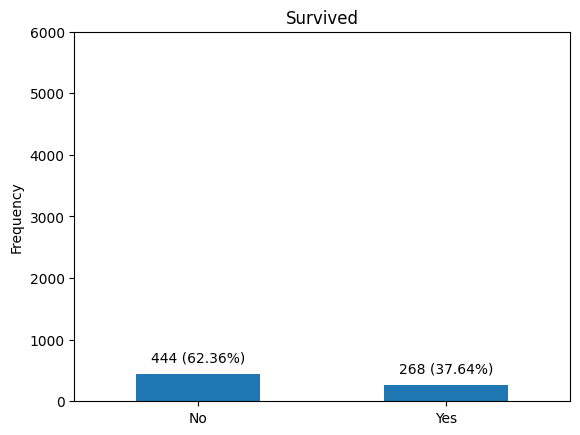

In [ ]:
imbalanced_viz(y_pretrain)

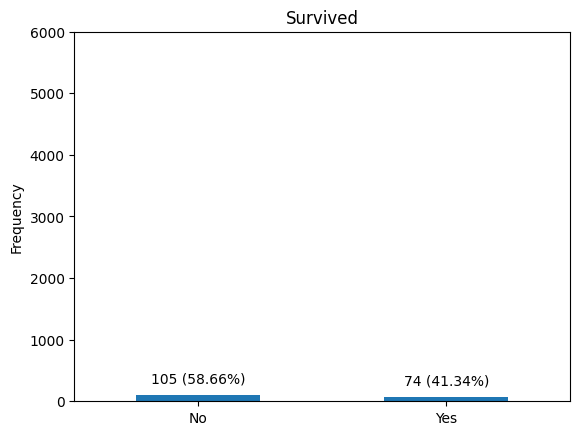

In [ ]:
imbalanced_viz(y_val)

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_resample, y_resample = smote.fit_resample(X_pretrain, y_pretrain)

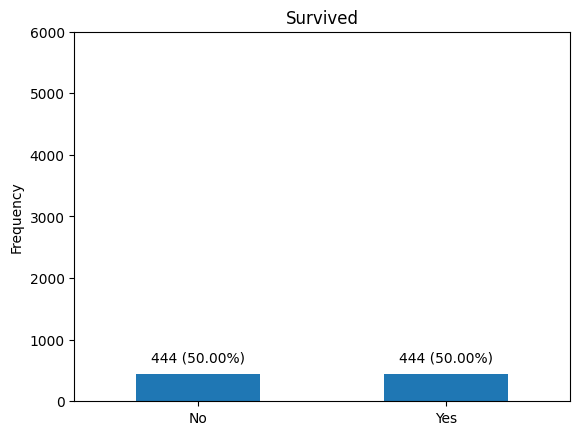

In [ ]:
imbalanced_viz(y_resample)

In [ ]:
# do split again
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,
                                                    test_size=0.2,
                                                    random_state = 42)

In [ ]:
# Training data shape after SMOTE
print('Shape of X_train after SMOTE : {}'.format(X_train.shape))
print('Shape of y_train after SMOTE : {}'.format(y_train.shape))
print()

# Testing data shape after SMOTE
print('Shape of X_test after SMOTE : {}'.format(X_test.shape))
print('Shape of y_test after SMOTE : {}'.format(y_test.shape))
print()

# Valication data shape before SMOTE, this is set as a unlooked up data from machine learning model
print('Shape of X_val before SMOTE : {}'.format(X_val.shape))
print('Shape of y_val before SMOTE : {}'.format(y_val.shape))

Shape of X_train after SMOTE : (710, 9)
Shape of y_train after SMOTE : (710,)

Shape of X_test after SMOTE : (178, 9)
Shape of y_test after SMOTE : (178,)

Shape of X_val before SMOTE : (179, 9)
Shape of y_val before SMOTE : (179,)


### Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],                                     # Regularization strength (the smaller C, the stronger the regulation)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],                    # Type of penalty used
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],     # Algorithm used for optimization
    'max_iter': [100, 200, 300]                                       # Maximum number of iterations
}

# Create a LogisticRegression model
lr_model2 = LogisticRegression(random_state=42)

# Create a GridSearchCV
grid_search_lr2 = GridSearchCV(
    estimator=lr_model2,
    param_grid=param_grid_lr,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_search_lr2.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_lr2 = grid_search_lr2.best_params_
best_model_lr2 = grid_search_lr2.best_estimator_

# Prediction on training data using the best model
y_train_pred_lr2 = best_model_lr2.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr2)
print("Classification Report Training Model (Logistic Regression) :\n",
      classification_report(y_train, y_train_pred_lr2, target_names=labels))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'none', 'solver': 'lbfgs'}
Classification Report Training Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.79      0.82      0.80       360
    Survived       0.80      0.78      0.79       350

    accuracy                           0.80       710
   macro avg       0.80      0.80      0.80       710
weighted avg       0.80      0.80      0.80       710



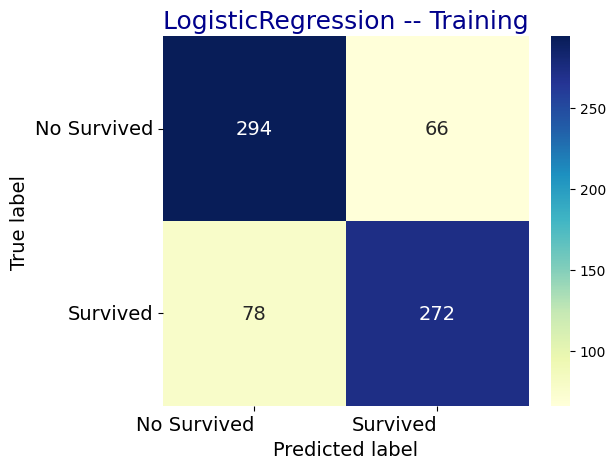

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on test data using the best model
y_test_pred_lr2 = best_model_lr2.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr2)
print("Classification Report Test Model (Logistic Regression) :\n",
      classification_report(y_test, y_test_pred_lr2, target_names=labels))

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'none', 'solver': 'lbfgs'}
Classification Report Test Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.79      0.82      0.81        84
    Survived       0.84      0.81      0.82        94

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178



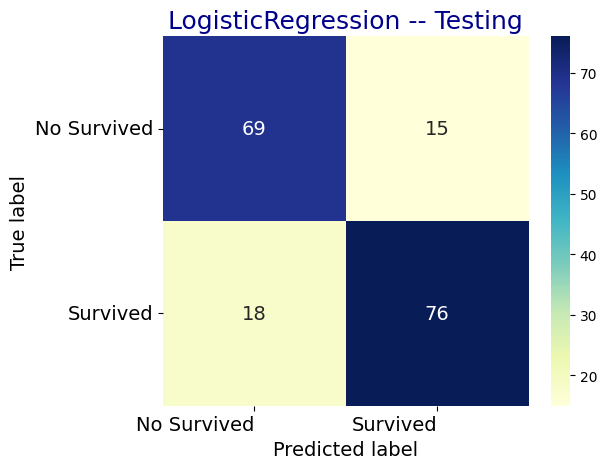

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Testing', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on validation data using the best model
y_val_pred_lr2 = best_model_lr2.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Logistic Regression:", best_params_lr2)
print("Classification Report Validation Model (Logistic Regression) :\n",
      classification_report(y_val, y_val_pred_lr2, target_names=labels))

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'none', 'solver': 'lbfgs'}
Classification Report Validation Model (Logistic Regression) :
               precision    recall  f1-score   support

 No Survived       0.86      0.82      0.84       105
    Survived       0.76      0.81      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



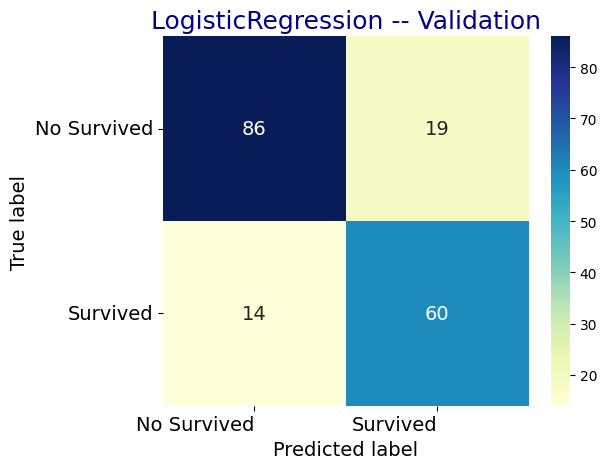

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_lr2)),('No Survived','Survived'),('No Survived','Survived') )
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14},fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LogisticRegression -- Validation', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_lr2, X_train, X_test, X_val, y_train, y_test, y_val)]

lr_model_score2 = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy', 'Validation Accuracy'])
lr_model_score2.insert(0, 'Model', 'Logistic Regression')

### Random Forest Classifier

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 1000],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]                 # Maximum depth of the tree
}

# Create a RandomForestClassifier model
rf_model2 = RandomForestClassifier(random_state=42)

# Create a GridSearchCV
grid_search_rf2 = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_search_rf2.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_rf2 = grid_search_rf2.best_params_
best_model_rf2 = grid_search_rf2.best_estimator_

# Prediction on training data using the best model
y_train_pred_rf2 = best_model_rf2.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf2)
print("Classification Report Training Model (Random Forest Classifier) :\n",
      classification_report(y_train, y_train_pred_rf2, target_names=labels))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Training Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.93      0.98      0.96       360
    Survived       0.98      0.92      0.95       350

    accuracy                           0.95       710
   macro avg       0.96      0.95      0.95       710
weighted avg       0.96      0.95      0.95       710



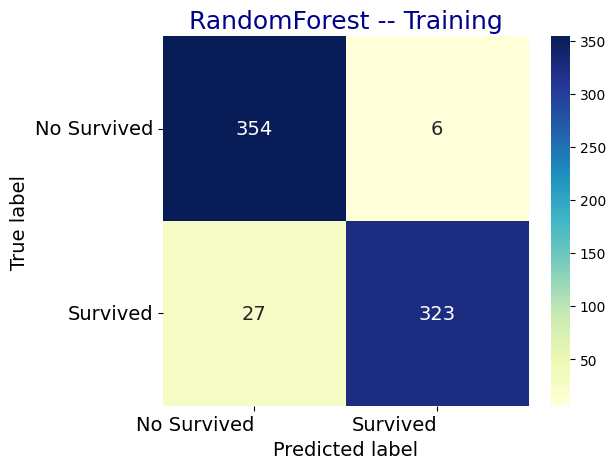

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('RandomForest -- Training', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on test data using the best model
y_test_pred_rf2 = best_model_rf2.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf2)
print("Classification Report Test Model (Random Forest Classifier) :\n",
      classification_report(y_test, y_test_pred_rf2, target_names=labels))

Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Test Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.84      0.87      0.85        84
    Survived       0.88      0.85      0.86        94

    accuracy                           0.86       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.86      0.86      0.86       178



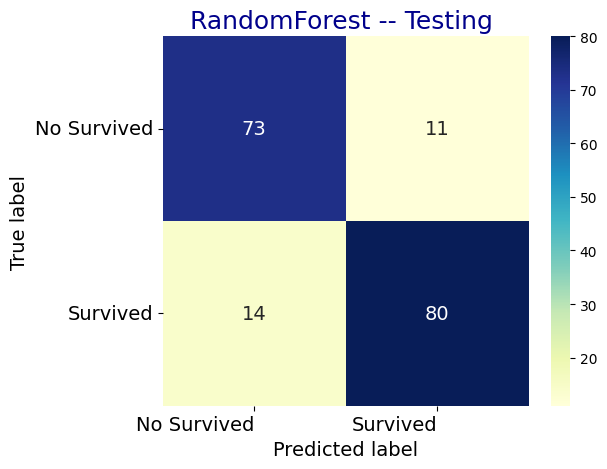

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('RandomForest -- Testing ', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on Validation data using the best model
y_val_pred_rf2 = best_model_rf2.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for Random Forest Classifier:", best_params_rf2)
print("Classification Report Validation Model (Random Forest Classifier) :\n",
      classification_report(y_val, y_val_pred_rf2, target_names=labels))

Best Parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 100}
Classification Report Validation Model (Random Forest Classifier) :
               precision    recall  f1-score   support

 No Survived       0.85      0.86      0.85       105
    Survived       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



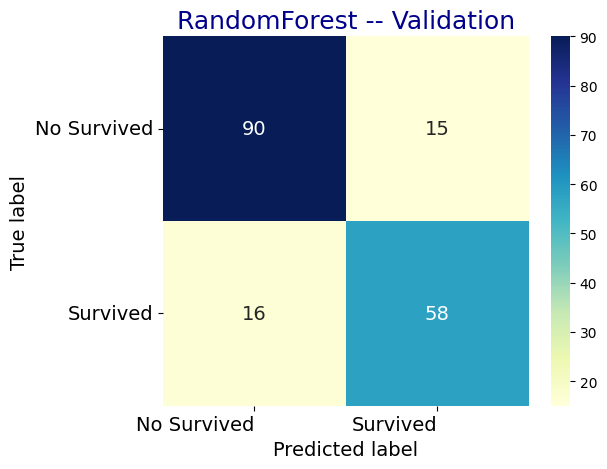

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_rf2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('RandomForest -- Validation', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_rf2, X_train, X_test, X_val, y_train, y_test, y_val)]

rf_model_score2 = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy','Validation Accuracy'])
rf_model_score2.insert(0, 'Model', 'Random Forest')

### Extreme Gradient Boosting (XGBoost)

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 150, 200],            # Number of trees in the ensemble
    'max_depth': [3, 6, 10],                    # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],          # Learning rate (learning rate)
    'gamma': [0, 0.1, 0.2],                     # Minimum loss reduction to create a new split
}

# Create an XGBClassifier model
xgb_model2 = XGBClassifier(random_state=42)

# Create a GridSearchCV
grid_searc_xgb2 = GridSearchCV(
    estimator=xgb_model2,
    param_grid=param_grid_xgb,
    cv=5,                                  # Number of folds for cross-validation
    scoring='accuracy',                    # Evaluation method used
    n_jobs=-1,                             # Uses all processor cores
    verbose=2                              # Level of verbosity
)

# Fit GridSearchCV on training data
grid_searc_xgb2.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
best_params_xgb2 = grid_searc_xgb2.best_params_
best_model_xgb2 = grid_searc_xgb2.best_estimator_

# Prediction on training data using the best model
y_train_pred_xgb2 = best_model_xgb2.predict(X_train)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb2)
print("Classification Report Training Model (XGB Classifier) :\n",
      classification_report(y_train, y_train_pred_xgb2, target_names=labels))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGB Classifier: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Classification Report Training Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.93      0.95      0.94       360
    Survived       0.95      0.93      0.94       350

    accuracy                           0.94       710
   macro avg       0.94      0.94      0.94       710
weighted avg       0.94      0.94      0.94       710



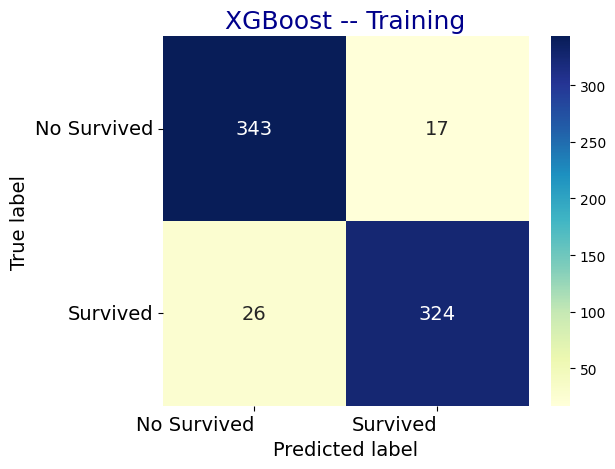

In [ ]:
# Perform data training: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Training', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on Test data using the best model
y_test_pred_xgb2 = best_model_xgb2.predict(X_test)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb2)
print("Classification Report Test Model (XGB Classifier) :\n",
      classification_report(y_test, y_test_pred_xgb2, target_names=labels))

Best Parameters for XGB Classifier: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Classification Report Test Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.81      0.88      0.85        84
    Survived       0.89      0.82      0.85        94

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178



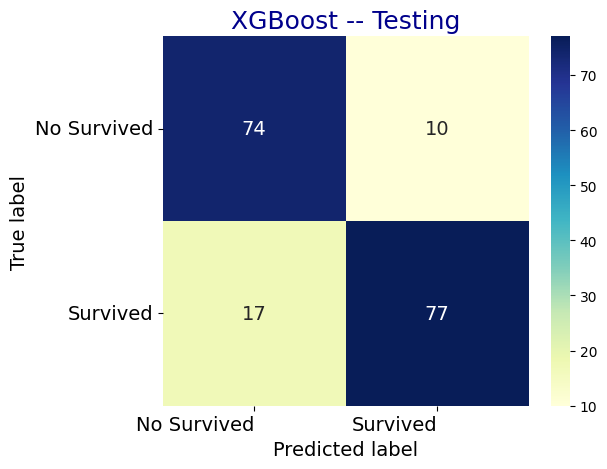

In [ ]:
# Perform data test: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Testing', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction on validation data using the best model
y_val_pred_xgb2 = best_model_xgb2.predict(X_val)

labels = ['No Survived', 'Survived']

# Evaluate the best model
print("Best Parameters for XGB Classifier:", best_params_xgb2)
print("Classification Report Validation Model (XGB Classifier) :\n",
      classification_report(y_val, y_val_pred_xgb2, target_names=labels))

Best Parameters for XGB Classifier: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Classification Report Validation Model (XGB Classifier) :
               precision    recall  f1-score   support

 No Survived       0.87      0.83      0.85       105
    Survived       0.77      0.82      0.80        74

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179



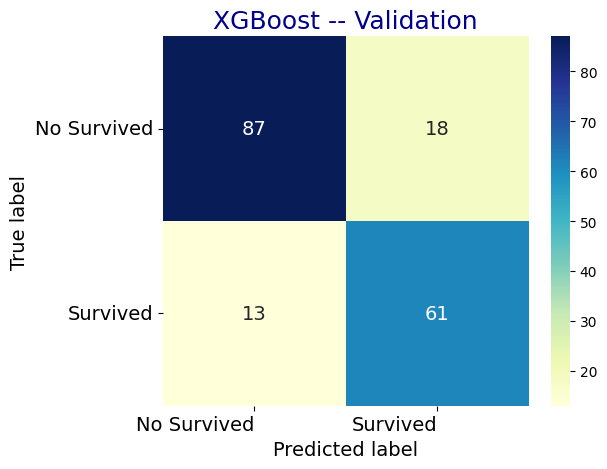

In [ ]:
# Perform data val: Confusion matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_val, y_val_pred_xgb2)), ('No Survived', 'Survived'), ('No Survived', 'Survived'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('XGBoost -- Validation', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:
#ACCURACY TRAIN TEST VALIDATION
ndf = [Models_Evaluation_Metrics(best_model_xgb2, X_train, X_test, X_val, y_train, y_test, y_val)]

xgb_model_score2 = pd.DataFrame(data = ndf, columns=['Training Accuracy','Test Accuracy','Validation Accuracy'])
xgb_model_score2.insert(0, 'Model', 'XGBoost')

# Finding the Best Model

In [ ]:
me = pd.concat([lr_model_score, rf_model_score, xgb_model_score], ignore_index=True, sort=False)
print('Accuracy each models without SMOTE : \n')
me

Accuracy each models without SMOTE : 



,Model,Training Accuracy,Test Accuracy,Validation Accuracy
0,Logistic Regression,80.84,81.82,79.33
1,Random Forest,94.90,82.52,83.24
2,XGBoost,83.30,82.52,80.45


In [ ]:
me2 = pd.concat([lr_model_score2, rf_model_score2, xgb_model_score2], ignore_index=True, sort=False)
print('Accuracy each models with SMOTE : \n')
me2

Accuracy each models with SMOTE : 



,Model,Training Accuracy,Test Accuracy,Validation Accuracy
0,Logistic Regression,79.72,81.46,81.56
1,Random Forest,95.35,85.96,82.68
2,XGBoost,93.94,84.83,82.68
